### Background: 

***An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.***

***Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.***

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?


# 1. Explore the dataset and extract insights using Exploratory Data Analysis

In [1]:
!pip install scipy==1.6.1

In [2]:
import scipy
scipy.__version__

'1.6.1'

In [3]:
# import  libraries for data manipulation 
import pandas as pd 
import numpy as np 

#import  libraries for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
# import probability distribution and statistical functions libraries
import scipy.stats as stats

In [4]:
# read the data
ab_test = pd.read_csv("abtest.csv")

In [5]:
# rest top 5 rows
ab_test.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [9]:
#how many rows and columns
ab_test.shape

(100, 6)

In [10]:
# concise summary of DataFrame
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [11]:
# summary statistics
ab_test.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [14]:
# summary of of non-numeric variables  
ab_test.describe(exclude='number')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [16]:
#Making a list of all categorical variables 
cat_col=['group', 'landing_page', 'converted', 'language_preferred']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(ab_test[column].value_counts())
    print('-'*50)
    
# 54 percent from the sample data converted

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
old    50
new    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


In [18]:
# checking missing values
ab_test.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Text(0.5, 1.0, 'Overall Time Spent On The Page')

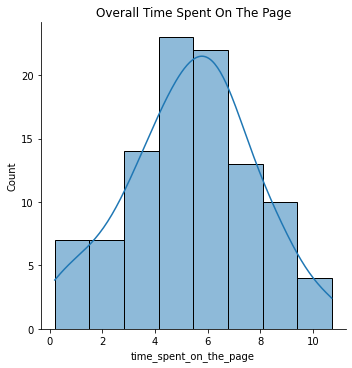

In [60]:
# distributions of time spent overall
sns.displot(ab_test['time_spent_on_the_page'],kde= 'True');
plt.title('Overall Time Spent On The Page')

In [64]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

<Figure size 1080x504 with 0 Axes>

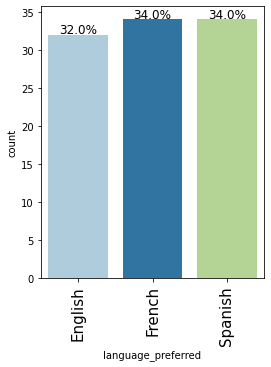

In [65]:
plt.figure(figsize=(15,7))
labeled_barplot(ab_test, 'language_preferred', perc=True)

Text(0.5, 1.0, 'Time Distribution Amongt Different Languages')

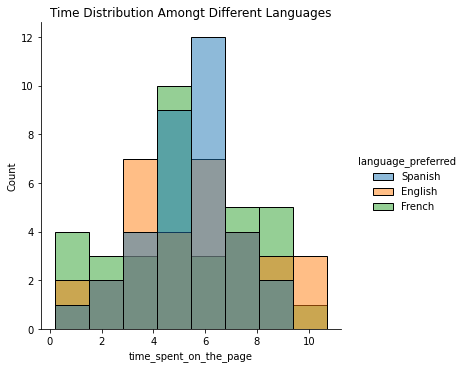

In [33]:
# time spent depending Language preferred 
sns.displot(ab_test, x='time_spent_on_the_page', hue='language_preferred')
plt.title ('Time Distribution Amongt Different Languages')

Text(0.5, 1.0, 'Numbers Converted based on Language Preferred')

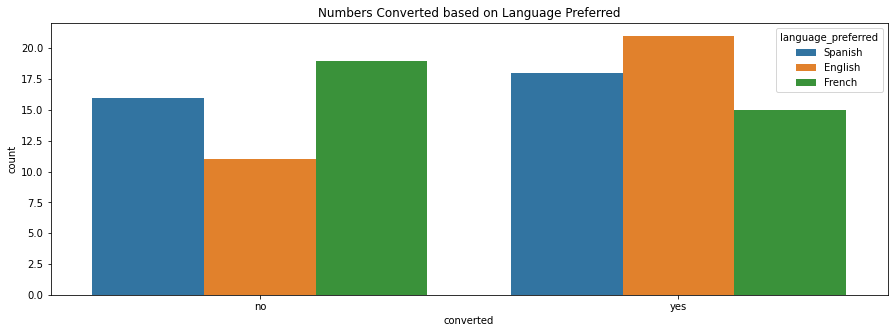

In [61]:
# conversion based on language_type
plt.figure (figsize=(15,5))
sns.countplot(ab_test['converted'], hue=ab_test['language_preferred']);
#English language converted the most out of the 54 while French language converted 
#the least and most to say no as well. 
plt.title ('Numbers Converted based on Language Preferred')

In [69]:
#Differentiate data between Old and New 
#old will be the data that includes the control group 
old = ab_test[ab_test['landing_page'].isin(['old'])]

In [70]:
#new will be the data that include the treatment group
new = ab_test[ab_test['landing_page'].isin(['new'])]

Text(0.5, 1.0, 'Time Spent on the Old Landing Page')

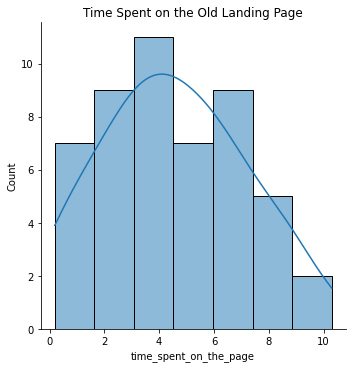

In [92]:
#plot chart to visualize time spent on the Old Landing Page
sns.displot(old['time_spent_on_the_page'],kde= 'True');
plt.title('Time Spent on the Old Landing Page')

Text(0.5, 1.0, 'Time Spent on the New Landing Page')

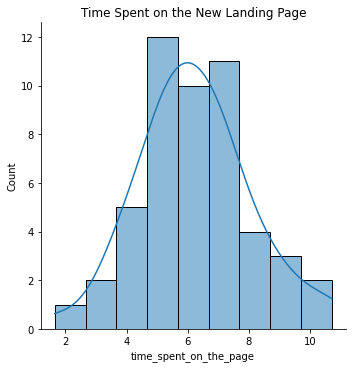

In [91]:
#plot chart to visualize time spent on the New Landing Page
sns.displot(new['time_spent_on_the_page'],kde= 'True');
plt.title('Time Spent on the New Landing Page')

In [78]:
#Making a list of all categorical variables 
cat_col=['group', 'landing_page', 'converted', 'language_preferred']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(old[column].value_counts())
    print('-'*50)
    
# 42 percent from the Old Landing Page converted
# Both the old and new landing page had the same number of languages preferred

control    50
Name: group, dtype: int64
--------------------------------------------------
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
no     29
yes    21
Name: converted, dtype: int64
--------------------------------------------------
Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64
--------------------------------------------------


In [79]:
#Making a list of all categorical variables 
cat_col=['group', 'landing_page', 'converted', 'language_preferred']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(new[column].value_counts())
    print('-'*50)
    
# 66 percent from the New Landing Page data converted
# Both the old and new landing page had the same number of languages preferred

treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    33
no     17
Name: converted, dtype: int64
--------------------------------------------------
Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Language Preferred for Old Landing Page')

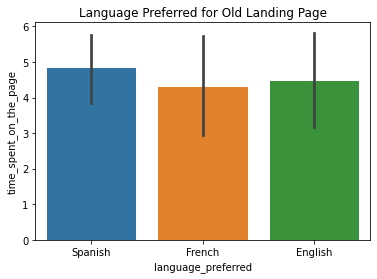

In [215]:
# plot time spent on old landing page compared to language preferred
sns.barplot(old['language_preferred'], old['time_spent_on_the_page']);
plt.title('Language Preferred for Old Landing Page')

Text(0.5, 1.0, 'Language Preferred for New Landing Page')

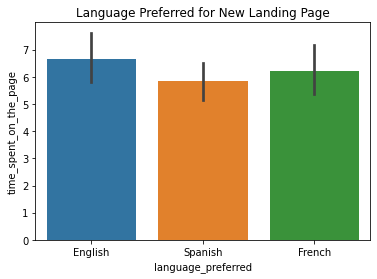

In [216]:
# plot time spent on new landing page compared to language preferred
sns.barplot(new['language_preferred'], new['time_spent_on_the_page']);
plt.title('Language Preferred for New Landing Page')

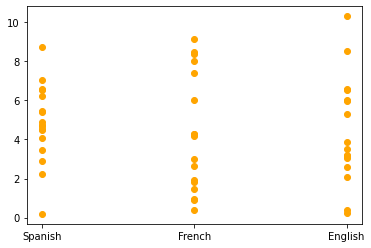

In [89]:
plt.scatter(old['language_preferred'], old['time_spent_on_the_page'], color='orange')

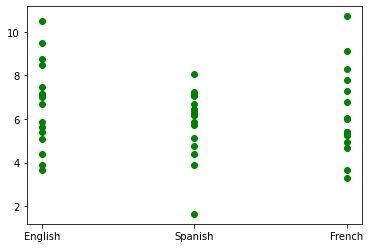

In [90]:
plt.scatter(new['language_preferred'], new['time_spent_on_the_page'], color='green')

# 2. Do the users spend more time on the new landing page than the old landing page?

**H0** : µO = µN

**Ha** : µN > µ0

In [181]:
from scipy.stats import norm

# estimating  the mean and standard deviation of time
# spent on the Old Landing Page.
mu = old["time_spent_on_the_page"].mean()
sigma= old["time_spent_on_the_page"].std()
print("The estimated mean is", round(mu, 4))
print("The estimated standard deviation is", round(sigma, 4))

The estimated mean is 4.5324
The estimated standard deviation is 2.582


In [182]:
# estimating  the mean and standard deviation of time
# spent on the New Landing Page.
mu = new["time_spent_on_the_page"].mean()
sigma = new["time_spent_on_the_page"].std()
print("The estimated mean is", round(mu, 4))
print("The estimated standard deviation is", round(sigma, 4))

The estimated mean is 6.2232
The estimated standard deviation is 1.817


Users in the old landing page spend an average of 4.5324 minutes with a standard deviation of 2.582 minutes

Users in the new landing page spend an average of 6.2232 minutes with a standard deviation of 1.817 minutes

In [183]:
import warnings
warnings.filterwarnings('ignore')

No handles with labels found to put in legend.


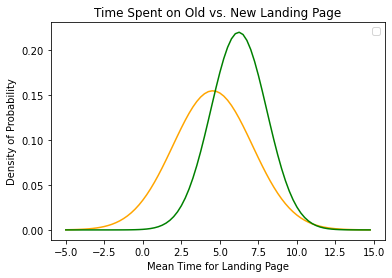

In [234]:
# visualizing both graphs together 
o=np.arange(-5, 15, 00.25)
n=np.arange(-5,15,0.25)

plt.plot(o, norm.pdf(o, 4.5324, 2.582), color='orange')
plt.plot(n, norm.pdf(n, 6.2232, 1.817), color='green')
plt.legend()
plt.xlabel('Mean Time for Landing Page')
plt.ylabel('Density of Probability')
plt.title('Time Spent on Old vs. New Landing Page')
plt.show()

In [185]:
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new['time_spent_on_the_page'], old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


***The p-value is 0.0013924 which is less than the given 0.05 level of significance, therefore the null hypothesis that the time spent of both landing page is the same is now rejected. The new landing page has more time spent than the old landing page.***

# 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**H0** : ConversionO = ConversionN

**Ha** : ConversionN > Conversion0

We know from the data above that 42 percent from the Old Landing Page converted and 66 percent from the New Landing Page data converted.

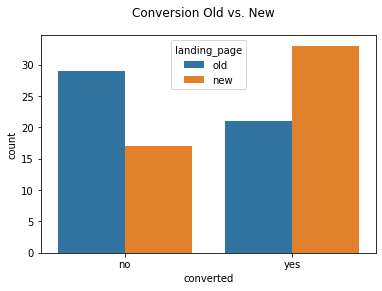

In [243]:
fig = plt.figure()
fig.suptitle('Conversion Old vs. New')
sns.countplot(ab_test['converted'], hue=ab_test['landing_page']);

In [187]:
from statsmodels.stats.proportion import proportions_ztest
yes = np.array([33, 21])
total=np.array([50, 50])
test_stat1, p_value1 = proportions_ztest(yes, total)
print('The p-value is ', str(p_value1))

The p-value is  0.016052616408112556


***The p-value is 0.016053 which is also less than the given 0.05 level of significance, therefore the null hypothesis that the conversion rates for both landing pages is the same is now rejected. The new landing page has a greater rate of conversion than the old landing page.***

# 4. Does the converted status depend on the preferred language? 

**H0** : Converted Status is Independent compared to Preferred Language

**Ha** : Converted Status depends on Preferred Language 

In [201]:
converted=pd.crosstab(index=ab_test['converted'], columns=ab_test['language_preferred'], margins=True, margins_name='Total')
converted

language_preferred,English,French,Spanish,Total
converted,,,,
no,11,19,16,46
yes,21,15,18,54
Total,32,34,34,100


In [203]:
from scipy.stats import chi2_contingency
chi2, p_value2, dof, expected=chi2_contingency(converted)
print('The p-value is ', p_value2)

The p-value is  0.7970832186581233


***The p-value is 0.79708 which is greater than the given 0.05 level of significance, therefore the null hypothesis that the converted status is independent compared to Preferred Language is Not rejected. The converted status and and preferred language are independent of each other.***

# 5. Is the mean time spent on the new page same for the different language users?


**H0** : µS = µF = µE= µN

**Ha** : Atleast one of the language mean is different

µS is the mean for Spanish, µF is the mean for French, µE is the mean for English

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


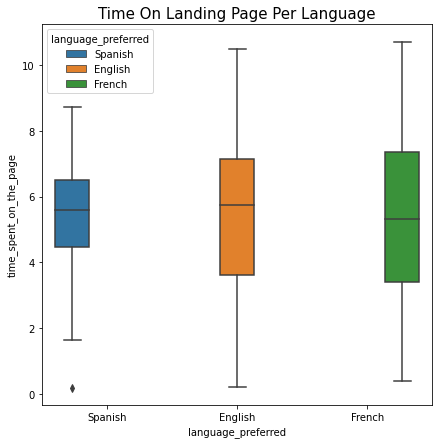

In [232]:
# mean of carbon emission at different levels of the fuel_type factor
print(ab_test.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (7,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = ab_test, hue = 'language_preferred')
a.set_title("Time On Landing Page Per Language", fontsize=15)
plt.show()

### Shapiro-Wilk's test

In [207]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(ab_test['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


### Levene’s test

We will test the null hypothesis

**H0** : All the population variances are equal

against the alternative hypothesis

**H0** : At least one variance is different from the rest

In [210]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( ab_test['time_spent_on_the_page'][ab_test['language_preferred']=="Spanish"], 
                                   ab_test['time_spent_on_the_page'][ab_test['language_preferred']=="English"], 
                                   ab_test['time_spent_on_the_page'][ab_test['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


### One-way Anova test

In [212]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(ab_test.loc[ab_test['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              ab_test.loc[ab_test['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              ab_test.loc[ab_test['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Multiple Comparison test (Tukey HSD)

In [214]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
comp = pairwise_tukeyhsd(endog = ab_test['time_spent_on_the_page'], groups = ab_test['language_preferred'], alpha = 0.05)
print(comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


***Since the p-values (p-adj column) for comparing the mean time spent on the page for the pairs English-French, English-Spanish and French-Spanish is greater than the significance level, the null hypothesis of equality of all population will NOT be rejected.***

***Thus, we can say that the mean time spent on the pages is similar amongst all language preference.***